In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The prysm stuff
from prysm.coordinates import make_xy_grid, cart_to_polar
from prysm.propagation import Wavefront, focus_fixed_sampling
from prysm.geometry import circle,spider
from prysm.segmented import CompositeHexagonalAperture
from prysm import thinlens
from prysm.polynomials import (
    noll_to_nm,
    zernike_nm,
    zernike_nm_sequence,
    hopkins,
    sum_of_2d_modes
)

np.random.seed(20240820)

In [2]:
# USER INPUT HERE
# IC = Instrument Configuration
IC = {
    'image_dx' : 4.87, # um
    'pupil_diameter' : 10950, # mm
    'focal_length' : 338492, # mm
    'wavelength' : 0.94, # um
}
SEGMENTED_PUPIL = False

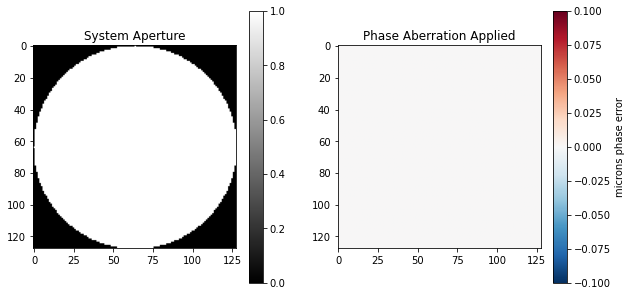

In [3]:
# optical system parameters
epd = IC['pupil_diameter'] # mm
efl = IC['focal_length'] # mm, Keck is F/13 I think
fno = efl / epd
wvl = IC['wavelength'] # um

# build the coordinate grids
x, y = make_xy_grid(128, diameter=epd)
r, t = cart_to_polar(x, y)
dx_p = x[0,1] - x[0,0]

A = circle(epd / 2, r)

# construct a polynomial basis to generate wavefront error
r_z = r / (epd / 2) # normalized radius
nms = [noll_to_nm(j) for j in range(2, 37)]
coefs = np.random.random(len(nms))
basis = list(zernike_nm_sequence(nms, r, t, norm=True))
basis_norm = [b / np.max(np.abs(b)) for b in basis]
phs = sum_of_2d_modes(basis_norm, coefs) * 0
amp = A

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.title('System Aperture')
plt.imshow(A, cmap='gray')
plt.colorbar()
plt.subplot(122)
plt.title('Phase Aberration Applied')
plt.imshow(phs * amp, cmap='RdBu_r')
plt.colorbar(label='microns phase error')
plt.show()

In [15]:
coefficient_vector = np.random.random([4, len(basis_norm)])
coefficient_vector = coefficient_vector.ravel()

coefficient_vector = coefficient_vector.reshape([4, len(basis_norm)])

def sum_of_4d_modes(modes, weights):

    modes = np.asarray(modes)

    return np.tensordot(modes, weights, axes=(0,0))

data = sum_of_4d_modes(basis_norm, coefficient_vector.T)

In [14]:
print(np.array(basis_norm).shape)
print(coefficient_vector.shape)

(35, 128, 128)
(4, 35)
